# Face detection + recognition pipline model

 This pipeline model consists of two parts:  
    1. Face detection - detecting faces in the image
    2. Face recognition - recognizing detected faces

## Importing necessary libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import grpc
import hydro_serving_grpc as hs
from grpc import ssl_channel_credentials

## Loading  test images

In [3]:
img1 = cv2.imread('5.png')
rgb1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('6.png')
rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

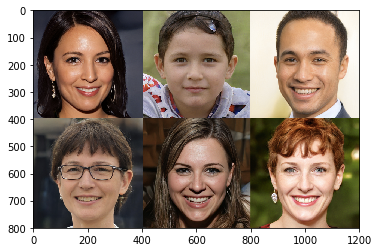

In [4]:
plt.imshow(rgb1)

## connecting to the server

In [45]:
channel = grpc.secure_channel("dev.k8s.hydrosphere.io", credentials=ssl_channel_credentials()) 
stub = hs.PredictionServiceStub(channel)

In [58]:
from time import sleep

# 1. Face detection demo

In [59]:
model_spec = hs.ModelSpec(name="face_detection", signature_name="detect")
tensor_shape = hs.TensorShapeProto(dim=[hs.TensorShapeProto.Dim(size=dim) for dim in rgb1.shape])
tensor = hs.TensorProto(dtype=hs.DT_UINT8, tensor_shape=tensor_shape, int_val=rgb1.flatten())
request = hs.PredictRequest(model_spec=model_spec, inputs={"x": tensor})
result = stub.Predict(request)

In [51]:
faces_tensor = result.outputs.get('faces')

In [52]:
faces = np.array(faces_tensor.int_val)
faces = faces.reshape([dim.size for dim in faces_tensor.tensor_shape.dim])
print(f'Detected {len(faces)} faces')

Detected 6 faces


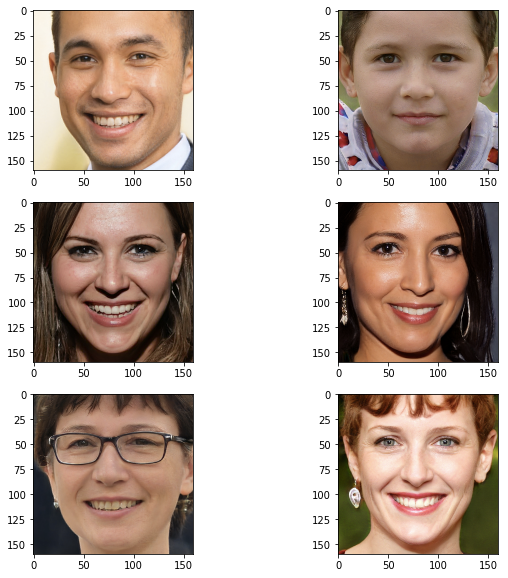

In [53]:
fig=plt.figure(figsize=(10, 10))
for i in range(1, 6 +1):
    fig.add_subplot(3, 2, i)
    plt.imshow(faces[i-1])
plt.show()

# 2. Face recognition demo

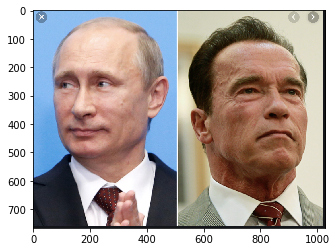

In [54]:
plt.imshow(rgb2)

In [55]:
pipeline_spec = hs.ModelSpec(name="face_recognition_pipeline", signature_name="INFERRED_PIPELINE_SIGNATURE")
tensor_shape = hs.TensorShapeProto(dim=[hs.TensorShapeProto.Dim(size=dim) for dim in rgb2.shape])
tensor = hs.TensorProto(dtype=hs.DT_UINT8, tensor_shape=tensor_shape, int_val=rgb2.flatten())

request = hs.PredictRequest(model_spec=pipeline_spec, inputs={"x": tensor})
result = stub.Predict(request)



In [56]:
print(f'Detected persons: {result.outputs.get("y").string_val}')

Detected persons: [b'Vladimir Putin', b'Arnold Schwarzenegger']
